In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
df=pd.read_csv('C:/Users/Amarnath/Documents/Data science/creddef.csv')

In [5]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [6]:
df.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

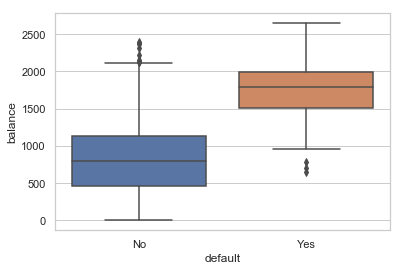

In [7]:
sns.boxplot(x='default', y='balance', data=df)
plt.show()

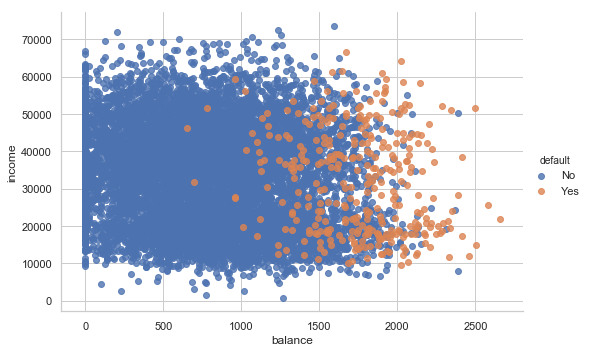

In [8]:
sns.lmplot(x='balance', y='income', hue='default', data=df, aspect=1.5, fit_reg=False)
plt.show()

In [36]:
pd.crosstab(df['default'], df['student'], rownames=['default'], colnames=['student'])

student,No,Yes
default,,
No,6850,2817
Yes,206,127


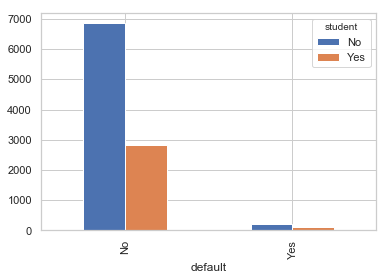

In [69]:
pd.crosstab(df['default'], df['student']).plot(kind='bar')

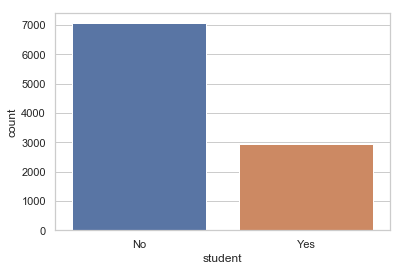

In [70]:
sns.countplot(x='student', data=df)
plt.show()


#Now split the data into categorical and numerical

In [39]:
dumms=df[['student','default']]
dummis=pd.get_dummies(dumms,drop_first=True)

In [40]:
dummis.head() #categorical Data

,student_Yes,default_Yes
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


In [41]:
num_cols=df.drop(['student','default'],axis=1)

In [42]:
num_cols.head() #numerical data

,balance,income
0,729.526495,44361.625074
1,817.180407,12106.134700
2,1073.549164,31767.138947
3,529.250605,35704.493935
4,785.655883,38463.495879


In [43]:
final_dataset=pd.concat([num_cols,dummis], axis=1)

In [44]:
final_dataset.head()

,balance,income,student_Yes,default_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,1,0
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [67]:
final_dataset.default_Yes.value_counts()

0    9667
1     333
Name: default_Yes, dtype: int64

In [49]:
final_dataset.isnull().sum()  #we do not have any null values.

balance        0
income         0
student_Yes    0
default_Yes    0
dtype: int64

Let's check if there is multicollinearty between features

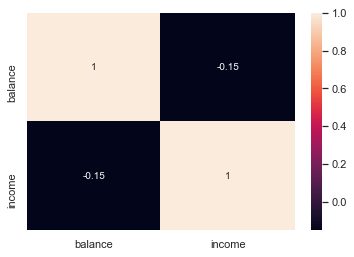

In [7]:
cor=df.corr()
sns.heatmap(cor, annot=True)

In [8]:
print(np.linalg.det(cor))     # calculates the determinants of matrix. determinants 1 shows no collinearity

0.9768219469779905


In [53]:
X=final_dataset[['balance','student_Yes','income']]   #preparing data to be trained
y=final_dataset['default_Yes']                       # Labels or results
from sklearn.model_selection import train_test_split       #to splitting the data into training and testing
from sklearn.linear_model import LogisticRegression         #importing Logistic regression Model


In [78]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=12345, stratify=y)
logmodel=LogisticRegression(class_weight='balanced')

In [79]:
logmodel.fit(X_train,y_train)                 #model is being trained

LogisticRegression(class_weight='balanced')

In [80]:
y_pred=logmodel.predict(X_test)             #Model is ready to predict. Let's Predict.
y_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=uint8)

In [81]:
print(logmodel.predict_proba(X_test))  #see how the model decided the default as yes or no based on probability


[[0.54719086 0.45280914]
 [0.84667737 0.15332263]
 [0.45389371 0.54610629]
 ...
 [0.21781387 0.78218613]
 [0.15991648 0.84008352]
 [0.71471681 0.28528319]]


In [98]:
from sklearn import metrics
print (metrics.accuracy_score(y_test,y_pred))
print (metrics.precision_score(y_test,y_pred))
print (metrics.recall_score(y_test,y_pred))
print (metrics.f1_score(y_test,y_pred))
print(logmodel.score(X_train, y_train))

0.664
0.08118081180811808
0.88
0.14864864864864863
0.6604285714285715


In [83]:
conf = metrics.confusion_matrix(y_test,y_pred)             #confusion Matrix

In [84]:
conf

array([[1904,  996],
       [  12,   88]], dtype=int64)

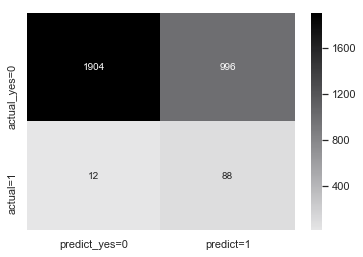

In [85]:
cmap=sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap=cmap,xticklabels=['predict_yes=0','predict=1'], yticklabels=['actual_yes=0','actual=1'], annot=True, fmt='d')

We have built our model in Logistic regression and we have also evaluated our model.
Now we will check our same data with Random Forest


In [73]:
from sklearn.ensemble import RandomForestClassifier  #import RF

In [99]:
rf_model = RandomForestClassifier(criterion = 'gini',  n_estimators = 100, max_depth = 10, random_state = 101, class_weight="balanced")
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=101)

In [100]:
rf_predict = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)

In [101]:
list(zip(X_train.columns,rf_model.feature_importances_))

[('balance', 0.8287246140140226),
 ('student_Yes', 0.008412237092823736),
 ('income', 0.16286314889315365)]

#Evalution

In [102]:
print (metrics.accuracy_score(y_test,rf_predict))
print (metrics.precision_score(y_test,rf_predict))
print (metrics.recall_score(y_test,rf_predict))
print (metrics.f1_score(y_test, rf_predict))
print(rf_model.score(X_train, y_train))

0.9406666666666667
0.3142857142857143
0.66
0.4258064516129032
0.9672857142857143


In [103]:
conff = metrics.confusion_matrix(y_test,rf_predict)  
conff

array([[2756,  144],
       [  34,   66]], dtype=int64)

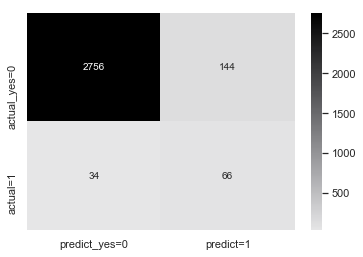

In [104]:
cmap=sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conff,cmap=cmap,xticklabels=['predict_yes=0','predict=1'], yticklabels=['actual_yes=0','actual=1'], annot=True, fmt='d')

In [ ]:
# In the Random Forest Model we have seen better accuracy than Logistiv Regression.

In [ ]:
#Conclusion-  In this project we have built two model. Logistic Regression and Random Forest. 
#we have seen some visualization and evalution.